In [7]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("./datos/heart.csv", header="infer")

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Vemos las variables numéricas

### Hay muchas flags como Int64... hacemos la lista a mano, nos quedamos con ['age', 'trtbps', 'chol', 'thalachh'] para el análisis estadístico

In [14]:
#numerics = ['int64', 'float64']
#cols = df.select_dtypes(include=numerics).columns

#cols = [col for col in cols if col not in ['sex', 'fbs', 'exng']]
#fields = df.select_dtypes(include=numerics).columns
#processsed_fields = [field for field in fields if field not in ['sex', 'fbs', 'exng', 'cp', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]
#processsed_fields


In [15]:
from scipy.stats import shapiro

def test_normality(data):
    stat, pvalue = shapiro(data)
    print(f"Result for {col}:")
    print("stat: %.9f, p: %.9f" % (stat, pvalue))
    if pvalue > 0.05:
        dist = "Gaussian"
    else:
        dist = "Non-gaussian"
    print(f"{dist} distribution\n")

In [16]:
interesting_cols = ['age', 'trtbps', 'chol', 'thalachh']

for col in interesting_cols:
    test_normality(df[col])

Result for age:
stat: 0.986371279, p: 0.005800595
Non-gaussian distribution

Result for trtbps:
stat: 0.965917349, p: 0.000001458
Non-gaussian distribution

Result for chol:
stat: 0.946881175, p: 0.000000005
Non-gaussian distribution

Result for thalachh:
stat: 0.976315141, p: 0.000066203
Non-gaussian distribution



## Como vemos no siguen distribuciones normales (?)

### Transformamos variables para convertirlas en normales

In [17]:
from scipy import stats

def boxcox_transform(data):
    fitted_data, fitted_lambda = stats.boxcox(data)
    test_normality(fitted_data)
    return fitted_data, data

In [18]:
interesting_cols = ['age', 'trtbps', 'chol', 'thalachh']

loop_cols = interesting_cols.copy()
for col in loop_cols:
    transformed_col = f"{col}_transformed"
    tranformed_data, data  = boxcox_transform(df[col])
    df[transformed_col] = tranformed_data

Result for age:
stat: 0.988755524, p: 0.019112740
Non-gaussian distribution

Result for trtbps:
stat: 0.991139889, p: 0.065170676
Gaussian distribution

Result for chol:
stat: 0.992871583, p: 0.158165038
Gaussian distribution

Result for thalachh:
stat: 0.992451847, p: 0.127896592
Gaussian distribution



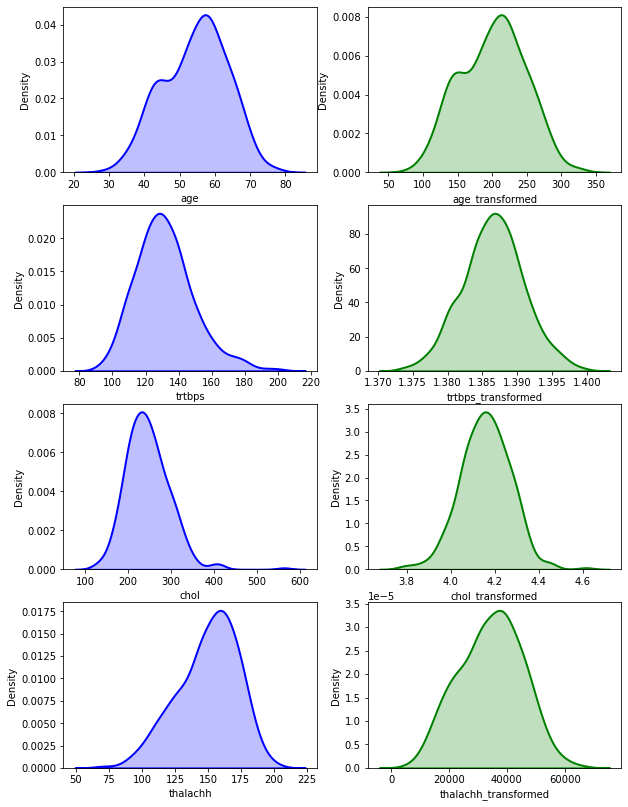

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

interesting_cols = ['age', 'trtbps', 'chol', 'thalachh']
extended_cols = []

fig, ax = plt.subplots(len(interesting_cols), 2)

for idx, col in enumerate(interesting_cols):
    transformed_col = f"{col}_transformed"

    sns.distplot(df[col], hist = False, kde = True,\
                    kde_kws = {'shade': True, 'linewidth': 2}, \
                    label = "Original data", color ="blue", ax = ax[idx][0])
    sns.distplot(df[transformed_col], hist = False, kde = True, \
                    kde_kws = {'shade': True, 'linewidth': 2},\
                    label = "Transformed data", color ="green", ax = ax[idx][1])

    extended_cols.append(col)
    extended_cols.append(transformed_col)

    # rescaling the subplots
fig.set_figheight(14)
fig.set_figwidth(10)
    

## Scaling

In [19]:
df[extended_cols].head()

,age,age_transformed,trtbps,trtbps_transformed,chol,chol_transformed,thalachh,thalachh_transformed
0,63,245.026003,145,1.390125,233,4.141081,150,33435.178719
1,37,115.210734,130,1.386589,250,4.180465,187,54788.235951
2,41,133.288287,130,1.386589,204,4.065939,172,45430.223348
3,56,207.381618,120,1.383821,236,4.148257,178,49057.156271
4,57,212.646759,120,1.383821,354,4.370746,163,40277.331099


In [22]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(df[extended_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=extended_cols)

## Homocedasticity verification Scaled vs Non-Scaled

In [23]:
def test_homocedasticity(df: pd.DataFrame, extended_cols: list, mode: str = 'mean'):
    transformed_fields = [col for col in extended_cols if col.__contains__('_transformed')]
    for first_field in transformed_fields:
        transformed_fields.remove(first_field)
        for second_field in transformed_fields:
            stat, pvalue = stats.levene(df[first_field], df[second_field], center=mode)
            print("stat: %.3f, p: %.3f" % (stat, pvalue))
            if pvalue > 0.05:
                dist = f"Homocedasticity between {first_field} and {second_field}"
            else:
                dist = f"Non-Homocedasticity between {first_field} and {second_field}"
            print(dist)


In [24]:
test_homocedasticity(df, extended_cols)

stat: 637.183, p: 0.000
Non-Homocedasticity between age_transformed and trtbps_transformed
stat: 634.335, p: 0.000
Non-Homocedasticity between age_transformed and chol_transformed
stat: 611.599, p: 0.000
Non-Homocedasticity between age_transformed and thalachh_transformed
stat: 442.544, p: 0.000
Non-Homocedasticity between chol_transformed and trtbps_transformed
stat: 616.870, p: 0.000
Non-Homocedasticity between chol_transformed and thalachh_transformed


In [208]:
test_homocedasticity(df_scaled, extended_cols)

stat: 0.768, p: 0.381
Homocedasticity between age_transformed and trtbps_transformed
stat: 0.703, p: 0.402
Homocedasticity between age_transformed and chol_transformed
stat: 0.009, p: 0.925
Homocedasticity between age_transformed and thalachh_transformed
stat: 0.001, p: 0.970
Homocedasticity between chol_transformed and trtbps_transformed
stat: 0.555, p: 0.457
Homocedasticity between chol_transformed and thalachh_transformed


## Testeamos normalidad en columnas scaled (?) -> No afecta. Siguen igual que después de Box-Cox.

In [213]:
for col in extended_cols:
    test_normality(df_scaled[col])

Result for age:
stat: 0.986370683, p: 0.005798970
Non-gaussian distribution

Result for age_transformed:
stat: 0.988754690, p: 0.019104499
Non-gaussian distribution

Result for trtbps:
stat: 0.965916693, p: 0.000001458
Non-gaussian distribution

Result for trtbps_transformed:
stat: 0.991140485, p: 0.065192305
Gaussian distribution

Result for chol:
stat: 0.946880937, p: 0.000000005
Non-gaussian distribution

Result for chol_transformed:
stat: 0.992872357, p: 0.158228323
Gaussian distribution

Result for thalachh:
stat: 0.976315618, p: 0.000066215
Non-gaussian distribution

Result for thalachh_transformed:
stat: 0.992451131, p: 0.127849057
Gaussian distribution



In [27]:
correlation_variables = ['thalachh_transformed', 'chol_transformed', 'trtbps_transformed']

## Matriz de correlación para variables normales y homocedasticas

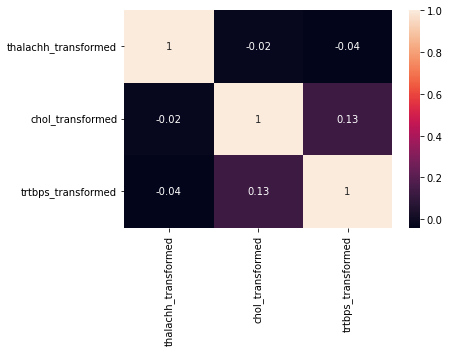

In [28]:
matrix = df_scaled[correlation_variables].corr(method='pearson').round(2)
sns.heatmap(matrix, annot=True)
plt.show()

### Matriz de correlación para la edad ("age")

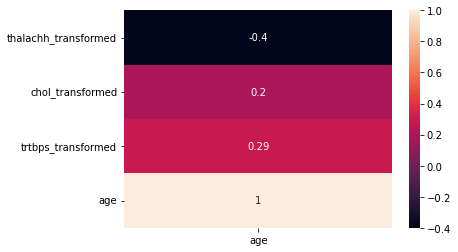

In [25]:
matrix = df_scaled[['thalachh_transformed', 'chol_transformed', 'trtbps_transformed', 'age']]\
            .corr(method='spearman').round(2)
sns.heatmap(matrix[["age"]], annot=True)
plt.show()

## Eliminar outliers

## Imputación  de valores por KNN

In [226]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
filled_data = imputer.fit_transform(df_scaled)

filled_df = pd.DataFrame(filled_data, columns=df_scaled.columns)
filled_df.head()

,age,age_transformed,trtbps,trtbps_transformed,chol,chol_transformed,thalachh,thalachh_transformed
0,0.952197,0.956202,0.763956,0.831647,-0.256334,-0.159046,0.015443,-0.081797
1,-1.915313,-1.831379,-0.092738,0.015355,0.072199,0.187193,1.633471,1.871370
2,-1.474158,-1.443191,-0.092738,0.015355,-0.816773,-0.819633,0.977514,1.015392
3,0.180175,0.147847,-0.663867,-0.623700,-0.198357,-0.095954,1.239897,1.347148
4,0.290464,0.260908,-0.663867,-0.623700,2.082050,1.859985,0.583939,0.544056
